Entropy of dataset: 1.584962500721156
Gini Index of dataset: 0.6666666666666667
Binned Data:
   sepal length (cm)  sepal width (cm)
0                0.0               2.0
1                0.0               1.0
2                0.0               2.0
3                0.0               1.0
4                0.0               2.0
Root Feature: sepal length (cm)
Accuracy: 0.5666666666666667


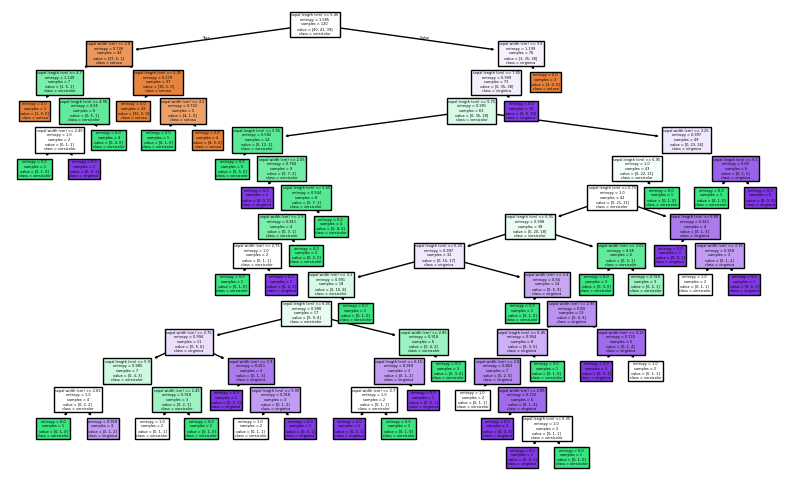

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


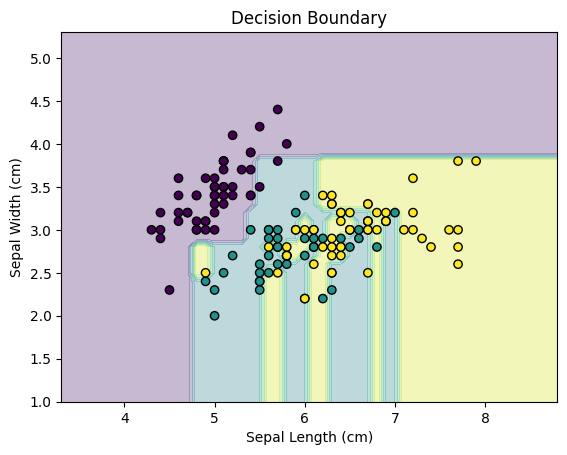

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load Dataset (A1)
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Selecting Two Features for Visualization (A7)
df = df[['sepal length (cm)', 'sepal width (cm)', 'target']]

# A1: Function to Calculate Entropy
def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# Print Entropy of the target column
print("Entropy of dataset:", entropy(df['target']))

# A2: Function to Calculate Gini Index
def gini_index(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

# Print Gini index of the target column
print("Gini Index of dataset:", gini_index(df['target']))

# A4: Function for Equal Width Binning
def bin_data(X, bins=4, strategy='uniform'):
    binner = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    return binner.fit_transform(X)

# Convert Features to Categorical (A4)
X_binned = bin_data(df[['sepal length (cm)', 'sepal width (cm)']])
X_binned = pd.DataFrame(X_binned, columns=['sepal length (cm)', 'sepal width (cm)'])
print("Binned Data:")
print(X_binned.head())

# A3: Information Gain Calculation for Root Node Selection
def information_gain(X, y):
    base_entropy = entropy(y)
    unique_values = np.unique(X)
    weighted_entropy = sum([(len(X[X == value]) / len(X)) * entropy(y[X == value]) for value in unique_values])
    return base_entropy - weighted_entropy

# Identifying the Root Feature (A3)
root_feature = max(df.columns[:-1], key=lambda f: information_gain(X_binned[f], df['target']))
print(f"Root Feature: {root_feature}")

# Splitting Data for Training (A5)
X_train, X_test, y_train, y_test = train_test_split(df[['sepal length (cm)', 'sepal width (cm)']], df['target'], test_size=0.2, random_state=42)

# Building Decision Tree (A5)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualizing the Decision Tree (A6)
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['sepal length (cm)', 'sepal width (cm)'], class_names=iris.target_names.astype(str), filled=True)
plt.show()

# Decision Boundary Visualization (A7)
x_min, x_max = df['sepal length (cm)'].min() - 1, df['sepal length (cm)'].max() + 1
y_min, y_max = df['sepal width (cm)'].min() - 1, df['sepal width (cm)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'], edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Boundary')
plt.show()
